In [2]:
import pandas as pd

In [3]:
pd.options.display.max_columns = None # type: ignore

In [4]:
data = pd.read_csv("Cleaned_Dataset.csv")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [6]:
# Choosing relevant features

marital_statuses = ["Marital_Status_Divorced", "Marital_Status_Married", 
                    "Marital_Status_Single", "Marital_Status_Unknown"]

demographics_features = ["Customer_Age", "Gender", "Dependent_count", 
                         "Education_Level", "Income_Category"]
demographics_features += marital_statuses

# Credit Card Usage
ccu_features = ["Card_Category","Months_on_book","Total_Revolving_Bal",
                "Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct",
                "Avg_Utilization_Ratio"]

selected_features = demographics_features + ccu_features

## Model Training

### Data Scaling

In [7]:
modes = data["Customer_Age"].mode()

print("Mean: " + str(data["Customer_Age"].mean()))
print("Median: " + str(data["Customer_Age"].median()))
print("Mode(s): " + ", ".join(str(mode) for mode in modes))

Mean: 46.26211764705882
Median: 46.0
Mode(s): 44, 49


Checking Distributions for other (selected) features that have a large range of data (more than 9 unique values).


In [8]:
selected_features_1 = [] # to plot to find out more about the distribution of the data

for x in selected_features:
    num_uniques = len(data[x].unique()) 
    if num_uniques > 9:
        print(x,":\t\t",num_uniques," unique values", sep='')
        selected_features_1.append(x)

Customer_Age:		45 unique values
Months_on_book:		44 unique values
Total_Revolving_Bal:		1841 unique values
Avg_Open_To_Buy:		5968 unique values
Total_Trans_Amt:		4415 unique values
Total_Trans_Ct:		124 unique values
Avg_Utilization_Ratio:		932 unique values


In [9]:
# Since I already plotted the distribution of "Customer_Age" in the other 
# notebook, I can skip that one.
selected_features_1.remove("Customer_Age")

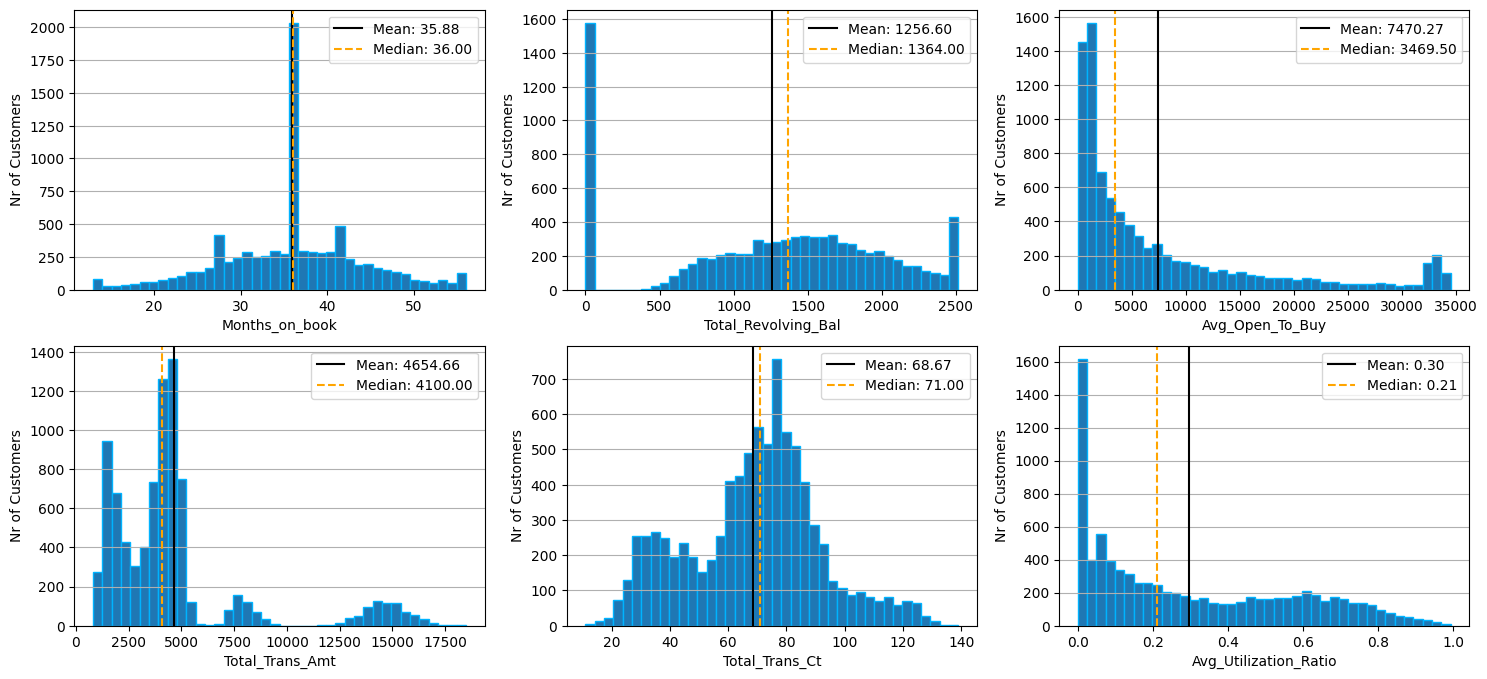

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
ax_flat = ax.flatten()

for i in range(len(ax_flat)):
    ax_flat[i].hist(data[selected_features_1[i]], bins=40, edgecolor = (0, 0.7, 1))
    ax_flat[i].set_xlabel(selected_features_1[i])
    ax_flat[i].set_ylabel("Nr of Customers")

    plt_mean = data[selected_features_1[i]].mean()
    plt_median = data[selected_features_1[i]].median()
    ax_flat[i].axvline(plt_mean, color="black", label="Mean: {:.2f}".format(plt_mean))
    ax_flat[i].axvline(plt_median, color="orange", label="Median: {:.2f}".format(plt_median), 
                       linestyle="dashed")
    
    ax_flat[i].grid(axis="y")
    ax_flat[i].legend()

plt.show()

In [11]:
data[selected_features].agg(["min", "max"])

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
min,26,0,0,0,0,0,0,0,0,0,13,0,15.0,816,11,0.000
max,73,1,5,6,5,1,1,1,1,3,56,2517,34516.0,18484,139,0.994


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaling = MinMaxScaler()
scaled_data = scaling.fit_transform(data[selected_features])

In [14]:
scaled_data

array([[0.40425532, 1.        , 0.6       , ..., 0.01856464, 0.2421875 ,
        0.06136821],
       [0.4893617 , 0.        , 1.        , ..., 0.02688476, 0.171875  ,
        0.1056338 ],
       [0.53191489, 1.        , 0.6       , ..., 0.06061807, 0.0703125 ,
        0.        ],
       ...,
       [0.59574468, 1.        , 0.2       , ..., 0.83546525, 0.8046875 ,
        0.15191147],
       [0.63829787, 0.        , 0.2       , ..., 0.77994114, 0.8515625 ,
        0.16498994],
       [0.5106383 , 1.        , 0.4       , ..., 0.8297487 , 0.828125  ,
        0.46478873]])

In [15]:
scaled_data = pd.DataFrame(scaled_data, columns=selected_features)

In [16]:
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000


### Elbow Method

In [17]:
k_range = [n for n in range(1, 11)]
wcss_list = []
for k in k_range:
    kMeans = cluster.KMeans(k).fit(scaled_data[selected_features])
    wcss = kMeans.inertia_ # Within-Cluster Sum of Squares (WCSS)
    wcss_list.append(wcss)

In [18]:
wcss_list

[13094.908523485343,
 9848.298122596936,
 8415.674853929471,
 7574.740612259545,
 6369.381067882155,
 6162.6572723736845,
 5531.98648048301,
 5273.126027662573,
 5439.793897901353,
 5039.506637913372]

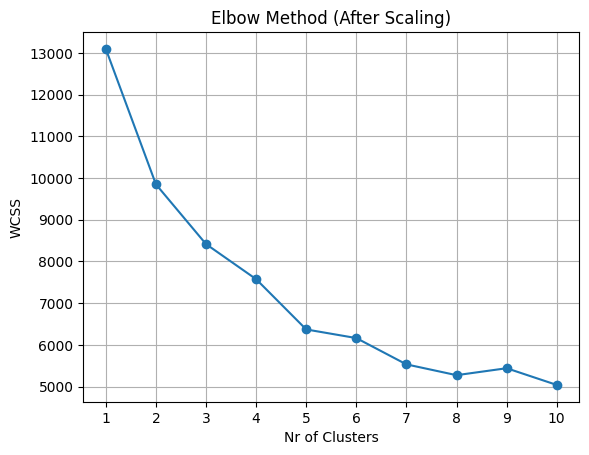

In [19]:
fig, ax = plt.subplots()

ax.plot(k_range, wcss_list, marker="o")
ax.set_ylabel("WCSS")
ax.set_xlabel("Nr of Clusters")
ax.set_title("Elbow Method (After Scaling)")
ax.set_xticks(k_range)
ax.grid()

### Silhouette Scores

In [20]:
k_range = [n for n in range(2, 11)]
sil_scores = []
df_labelSets = pd.DataFrame()

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(scaled_data[selected_features]).labels_
    sil_score = metrics.silhouette_score(scaled_data[selected_features], labels, random_state=0) 
    # print ("Silhouette score for {} clusters is {}".format(k,sil_score))

    sil_scores.append(sil_score)
    df_labelSets.insert(len(df_labelSets.columns), str(k), labels) # Used for "Cluster" column creation

print("Success")

Success


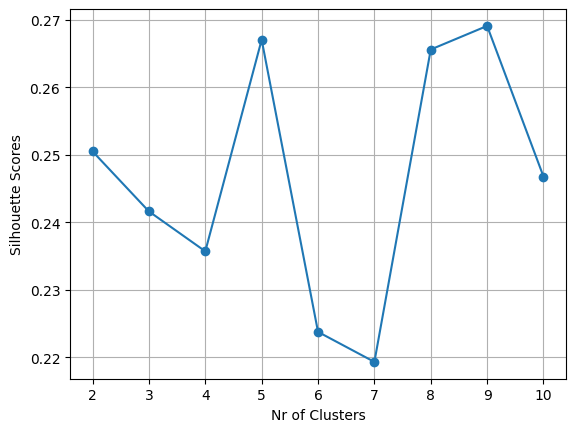

In [21]:
fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.grid()

plt.show()

In [22]:
print("5 Clusters: " + str(sil_scores[3])) 
print("9 Clusters: " + str(sil_scores[7]))

5 Clusters: 0.26702573641982685
9 Clusters: 0.2690707247348101


Therefore, the new optimal number of clusters is **9**.

In [23]:
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000


After trying and failing the create some useful scatter plots out of these features, I decided to remove those cells from this notebook, and focus first on Dimensionality Reduction.

### PCA For Dimensionality Reduction

In [24]:
from sklearn.decomposition import PCA
import numpy as np

In [25]:
def calcProportions(width: float, aspect_ratio = 16/9):
    return (width , width / aspect_ratio)

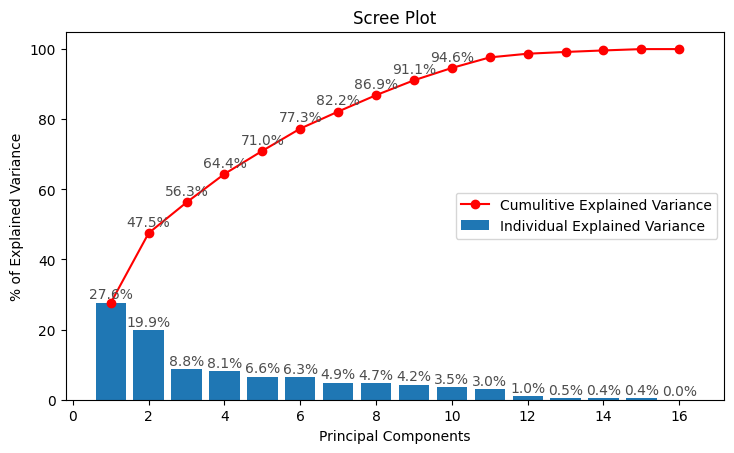

In [26]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

eigenvalues = pca.explained_variance_ # Get the eigenvalues from the PCA object

# Calculate the percentage of explained variance for each component
explained_variance = eigenvalues / sum(eigenvalues) * 100

# Create the scree plot
cumulative_sum = np.cumsum(explained_variance) # Calculate cumulative sum

x_axis = [x for x in range(1, len(explained_variance)+1)]

fig, ax = plt.subplots(figsize=(calcProportions(8.5)))

ax.bar(x_axis,explained_variance, label = "Individual Explained Variance")
ax.plot(x_axis, cumulative_sum, marker='o', color="red", label="Cumulitive Explained Variance")

ax.set_xlabel('Principal Components')
ax.set_ylabel('% of Explained Variance')
ax.set_title('Scree Plot')

RGBA = 0.3

for i in range(1, 10):
    ax.annotate(text="{:.1f}%".format(cumulative_sum[i]), 
                xy=(i+1,cumulative_sum[i]), ha="center", xytext=(0, 5), 
                textcoords="offset points", color=(RGBA, RGBA, RGBA))

for i in range(len(explained_variance)):
    ax.annotate(text="{:.1f}%".format(explained_variance[i]), 
                xy=(i+1,explained_variance[i]), ha="center", xytext=(0, 3), 
                textcoords="offset points", color=(RGBA, RGBA, RGBA))

ax.legend(loc="center right")

plt.show()

Not the results I was hoping for.

In [27]:
pca_3 = PCA(3)
pca_3_data = pca_3.fit_transform(scaled_data)

pca.explained_variance_ratio_

array([2.76217843e-01, 1.99036392e-01, 8.75529453e-02, 8.11232671e-02,
       6.59581531e-02, 6.33838298e-02, 4.85798564e-02, 4.68211625e-02,
       4.24010269e-02, 3.51476964e-02, 3.01326023e-02, 1.04841416e-02,
       5.02368655e-03, 4.30082351e-03, 3.83657331e-03, 3.17579378e-32])

In [28]:
print("{:.2f}%".format(pca_3.explained_variance_ratio_.sum()*100))

56.28%


In [29]:
pca_magnitudes_df = pd.DataFrame(abs(pca_3.components_), columns=selected_features,index=["PC1", "PC2", "PC3"]).transpose()
pca_magnitudes_df

,PC1,PC2,PC3
Customer_Age,0.013521,0.006776,0.023557
Gender,0.025320,0.840050,0.370785
Dependent_count,0.005950,0.015246,0.076944
Education_Level,0.002876,0.005790,0.016946
Income_Category,0.009249,0.364877,0.197535
Marital_Status_Divorced,0.015054,0.003367,0.153375
Marital_Status_Married,0.719433,0.013627,0.099106
Marital_Status_Single,0.689644,0.001963,0.190157
Marital_Status_Unknown,0.014735,0.012223,0.135889
Card_Category,0.009390,0.035453,0.045978


In [100]:
threshhold = 0.4 # Magnitude to filter with, and list important features
pca_magnitudes_df[pca_magnitudes_df > threshhold].dropna(axis="index", how="all")

,PC1,PC2,PC3
Gender,NaN,0.84005,NaN
Marital_Status_Married,0.719433,NaN,NaN
Marital_Status_Single,0.689644,NaN,NaN
Total_Revolving_Bal,NaN,NaN,0.610398
Avg_Utilization_Ratio,NaN,NaN,0.532821


### Silhouette Scores and PCA Plotting

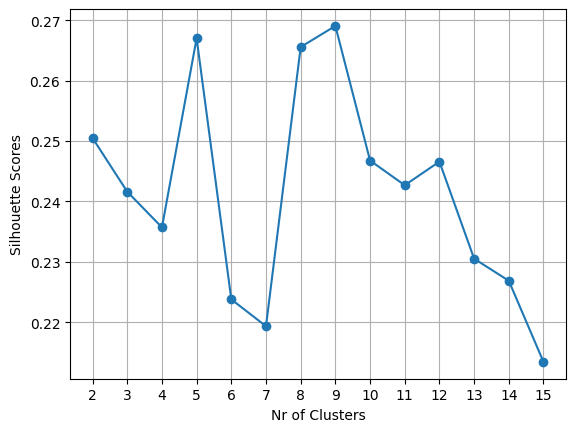

In [67]:
k_range = [n for n in range(2, 16)]
sil_scores = []

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(scaled_data[selected_features]).labels_
    sil_score = metrics.silhouette_score(scaled_data[selected_features], labels, random_state=0) 
    sil_scores.append(sil_score)

fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.set_xticks(k_range)
ax.grid()

plt.show()


The best number of clusters is: **9**

In [97]:
kMeans = cluster.KMeans(9,random_state=0).fit(scaled_data[selected_features])
cluster_labels = kMeans.labels_

In [81]:
pca_3_df = pd.DataFrame(pca_3_data, columns=["PC1", "PC2", "PC3"])
pca_3_df.insert(len(pca_3_df.columns), "Clusters", cluster_labels)
pca_3_df

,PC1,PC2,PC3,Clusters
0,-0.664870,0.560917,0.064076,4
1,0.760769,-0.460982,0.204537,0
2,-0.667666,0.591058,0.247035,4
3,0.041364,-0.699522,-0.276933,3
4,-0.657986,0.532708,0.237969,4
...,...,...,...,...
8495,0.763442,0.586767,-0.257932,2
8496,-0.633323,0.631941,-0.065191,4
8497,0.771702,0.516404,-0.308597,2
8498,0.810476,-0.527473,0.268613,0


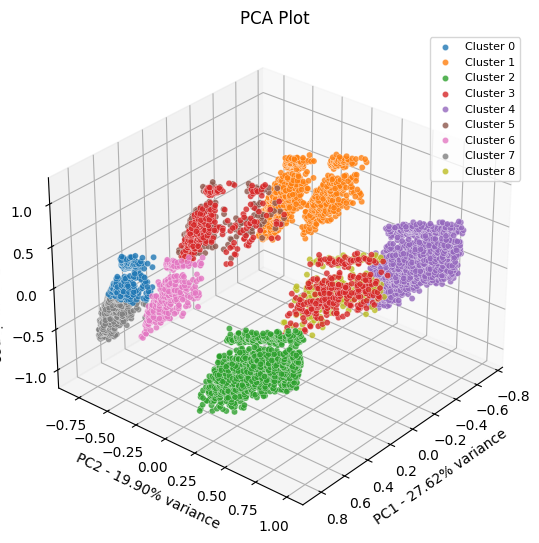

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(6.5, 6.5), subplot_kw={"projection":"3d"})

ALPHA_3D = 0.8

def plot_clusters_3D(clusterNum: str):
    ax.scatter3D(pca_3_df.query("Clusters == "+clusterNum)["PC1"], 
                    pca_3_df.query("Clusters == "+clusterNum)["PC2"], 
                    pca_3_df.query("Clusters == "+clusterNum)["PC3"],
                    label="Cluster "+str(clusterNum),
                    edgecolors="white", linewidths=0.25,
                    alpha=ALPHA_3D)

for i in range(9):
    plot_clusters_3D(str(i))

ax.set_xlabel("PC1 - {:.2f}% variance".format(pca_3.explained_variance_ratio_[0]*100))
ax.set_ylabel("PC2 - {:.2f}% variance".format(pca_3.explained_variance_ratio_[1]*100))
ax.set_zlabel("PC3 - {:.2f}% variance".format(pca_3.explained_variance_ratio_[2]*100))
ax.set_title("PCA Plot")

ax.legend(loc="upper right", fontsize=8)
ax.view_init(30,40)

plt.show()

In [106]:
defualtColors = plt.rcParams['axes.prop_cycle'].by_key()['color']

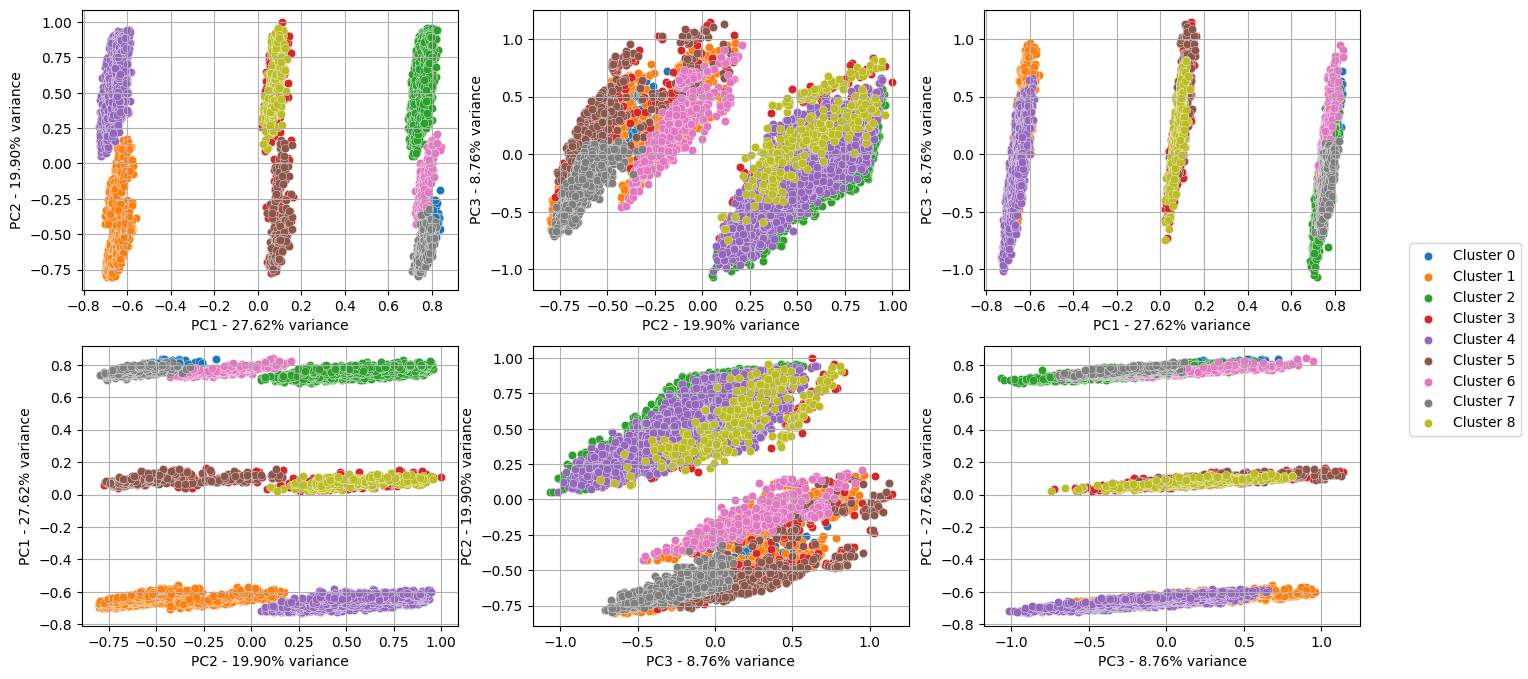

In [158]:
fig, ax = plt.subplots(2, 3, figsize=(16.5, 8))
ax = ax.flatten()

ALPHA_2D = 1

def plot_clusters_2D(suplt, clusterNum: str, x_axis: str, y_axis: str, cluster_label = None, color = None):
    suplt.scatter(pca_3_df.query("Clusters == "+clusterNum)[x_axis], 
                  pca_3_df.query("Clusters == "+clusterNum)[y_axis],
                  c=color, edgecolors="white", linewidths=0.25, 
                  label=cluster_label, alpha=ALPHA_2D)
    
def set_labels(subplt, x_axis: str, y_axis: str):
    pc_labels = ["PC1", "PC2", "PC3"]

    if x_axis == y_axis:
        print("Error: The x and y axes shouldn't have the same label.")
        return

    for i in range(len(pc_labels)):
        if x_axis == pc_labels[i]:
            subplt.set_xlabel("{} - {:.2f}% variance".format(pc_labels[i], pca_3.explained_variance_ratio_[i]*100))

        if y_axis == pc_labels[i]:
            subplt.set_ylabel("{} - {:.2f}% variance".format(pc_labels[i], pca_3.explained_variance_ratio_[i]*100))

# axes = ["PC1", "PC2", "PC1", "PC2", "PC3", "PC3"]
axes = ["PC1", "PC2", "PC1", "PC2", "PC3", "PC3", "PC2", "PC3", "PC3", "PC1", "PC2", "PC1"]

for i in range(6):
    if i == 0:
        for j in range(9):
            plot_clusters_2D(ax[i], str(j), axes[i], axes[i+6], "Cluster "+str(j))
    else:
        for j in range(9):
            plot_clusters_2D(ax[i], str(j), axes[i], axes[i+6])
    set_labels(ax[i], axes[i], axes[i+6])
    ax[i].grid()

fig.legend(loc="center right")

plt.show()

Filtering out smaller clusters.

In [129]:
for i in range(9):
    print("Cluster {} size: {}".format(i, len(pca_3_df.query("Clusters == @i"))))

Cluster 0 size: 530
Cluster 1 size: 2039
Cluster 2 size: 1531
Cluster 3 size: 620
Cluster 4 size: 1939
Cluster 5 size: 334
Cluster 6 size: 339
Cluster 7 size: 875
Cluster 8 size: 293


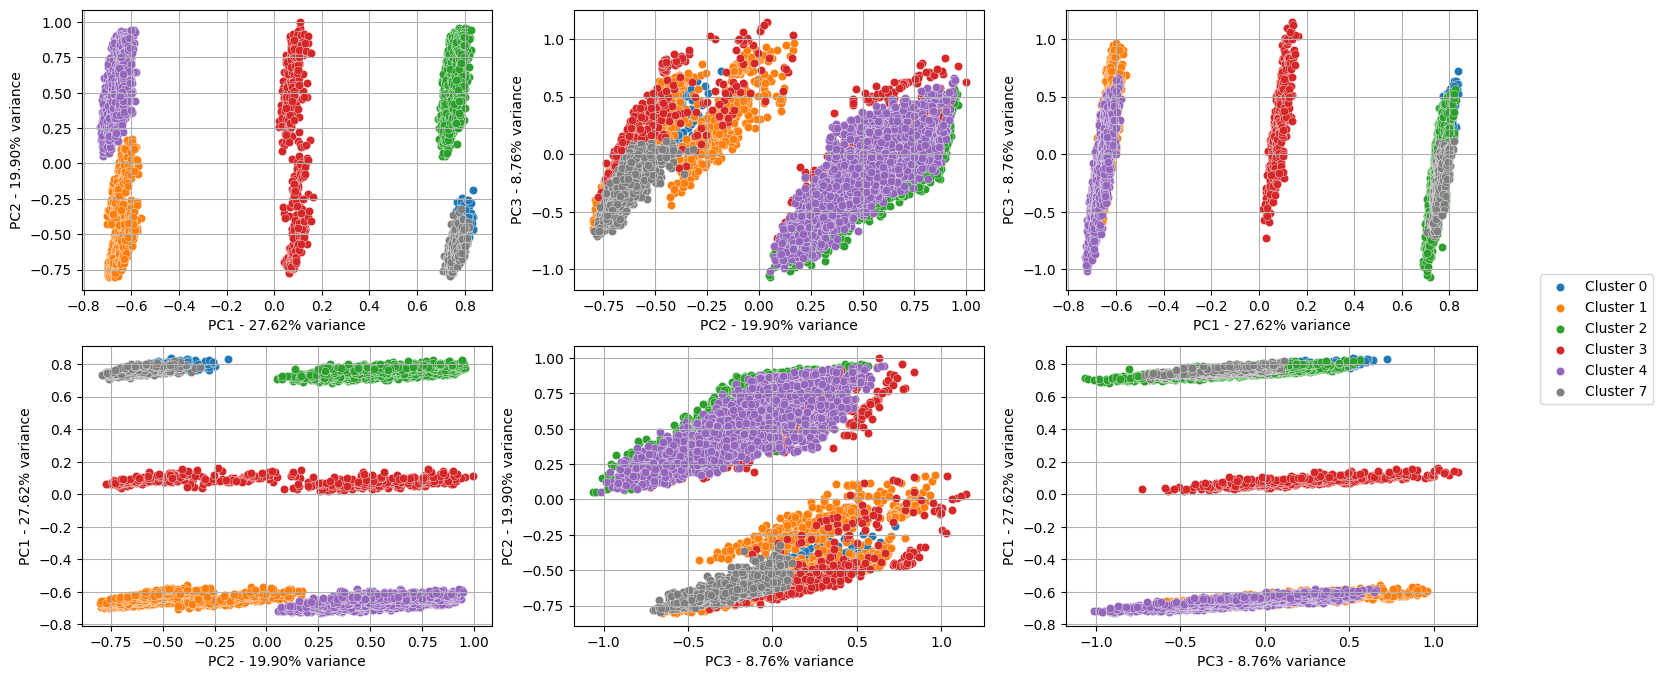

In [151]:
def filterClusters(selected_clusters: list[int]):
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    ax = ax.flatten()

    for i in range(6):
        if i == 0:
            for j in selected_clusters:
                plot_clusters_2D(ax[i], str(j), axes[i], axes[i+6], color=defualtColors[j], cluster_label="Cluster "+str(j))
        else:
            for j in selected_clusters:
                plot_clusters_2D(ax[i], str(j), axes[i], axes[i+6], color=defualtColors[j])
        set_labels(ax[i], axes[i], axes[i+6])
        ax[i].grid()

    fig.legend(loc="center right")
    plt.show()

filterClusters([0, 1, 2, 3, 4, 7]) # containing clusters with over 500 data-points

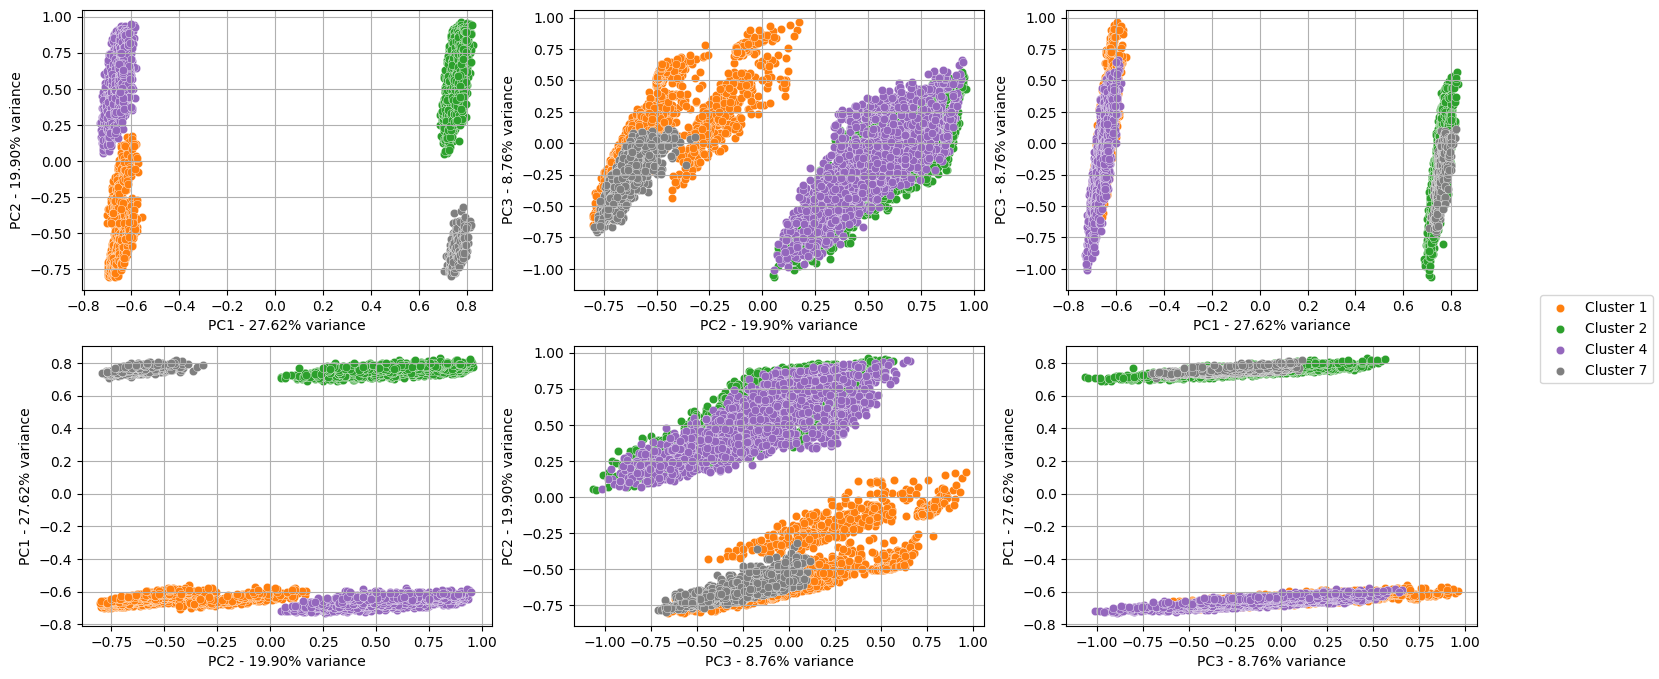

In [159]:
filterClusters([1, 2, 4, 7]) # containing clusters with over 800 data-points

In [181]:
pca_components_data = pd.DataFrame(pca_3.components_, columns=selected_features,index=["PC1", "PC2", "PC3"]).transpose()
pca_components_data.style.background_gradient()

,PC1,PC2,PC3
Customer_Age,-0.013521,-0.006776,-0.023557
Gender,-0.025320,0.840050,-0.370785
Dependent_count,-0.005950,0.015246,0.076944
Education_Level,0.002876,-0.005790,-0.016946
Income_Category,-0.009249,0.364877,0.197535
Marital_Status_Divorced,0.015054,0.003367,0.153375
Marital_Status_Married,-0.719433,-0.013627,-0.099106
Marital_Status_Single,0.689644,-0.001963,-0.190157
Marital_Status_Unknown,0.014735,0.012223,0.135889
Card_Category,0.009390,0.035453,0.045978
